# **Projeto 2 de Introdução à Ciência de Dados**

**Análise Exploratória de Dados**


Nome: Matheus de Castro Siniscarchio - 10857130

Nome:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
iris = pd.read_csv('data/iris.csv', header=(0))
iris.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.shape

(150, 5)

#### 1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas $\lambda$ no intervalo [1,10] e mostre o gráfico da média em função da variância.

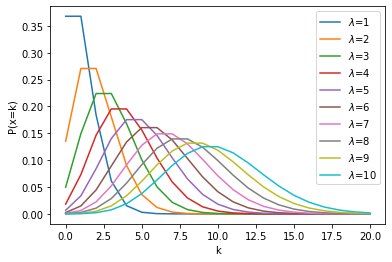

In [6]:
k = np.linspace(0,20,21)

for j in range(1,11):
    lambda1 = j
    v =[]
    for i in range(len(k)):
        v.append((((lambda1**k[i]))*np.exp(-1.0*lambda1))/math.factorial(k[i]))

    plt.plot(k,v, label =r'$\lambda$='+str(j))
    plt.xlabel('k')
    plt.ylabel('P(x=k)')
    plt.legend()
    #plt.tight_layout()

#### 2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

calculo da media:

In [7]:
#selecionamos todos os dados menos a ultima coluna
aux = iris[iris.columns[0:iris.shape[1]-1]]

#convertemos para o formato numpy
x = np.array(aux, dtype = float)

np.nanmean(x, axis = 0)

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

calculo da variância:

In [8]:
np.nanvar(aux, axis = 0)

array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

calculo IQR

In [9]:
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3 - Q1
IQR

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

#### 3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

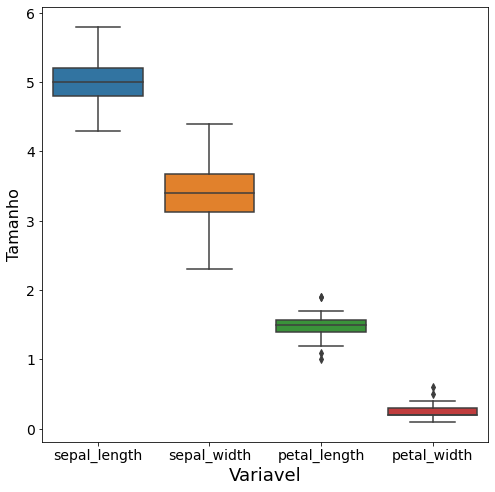

In [10]:
plt.figure(figsize=(8, 8))
# mostra o boxplot
#y="sepal_length" x="species"
sns.boxplot(data = iris[iris['species'] == 'setosa'])
plt.xlabel('Variavel', fontsize=18)
plt.ylabel('Tamanho', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

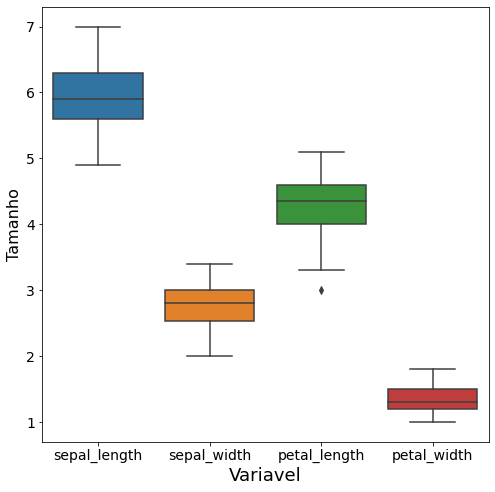

In [11]:
plt.figure(figsize=(8, 8))
# mostra o boxplot
#y="sepal_length" x="species"
sns.boxplot(data = iris[iris['species'] == 'versicolor'])
plt.xlabel('Variavel', fontsize=18)
plt.ylabel('Tamanho', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)


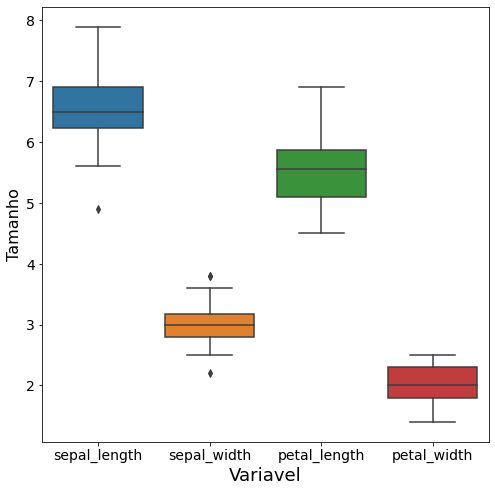

In [12]:
plt.figure(figsize=(8, 8))
# mostra o boxplot
#y="sepal_length" x="species"
sns.boxplot(data = iris[iris['species'] == 'virginica'])
plt.xlabel('Variavel', fontsize=18)
plt.ylabel('Tamanho', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

#### 4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

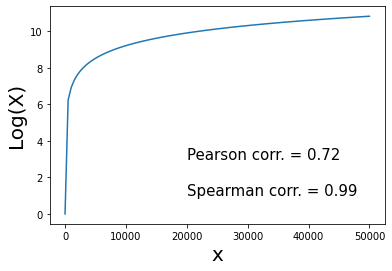

In [13]:
from scipy.stats import pearsonr, spearmanr

N = 100
x = np.linspace(1, 50000, N) 
z = np.log(x)

plt.plot(x, z) 
plt.xlabel("x",fontsize = 20) 
plt.ylabel("Log(X)", fontsize = 20) 
corr, p_value = pearsonr(x, z)
corrs, p_values = spearmanr(x, z)
corr = int(corr*100)/100
corrs = int(corrs*100)/100
string = 'Pearson corr. = '+ str(corr)
plt.text(20000,3, string, fontsize=15)
string = 'Spearman corr. = '+ str(corrs)
plt.text(20000,1, string, fontsize=15)
plt.show()

#### 5 - Considere o código acima que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para  Y=0.5∗X+  ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).

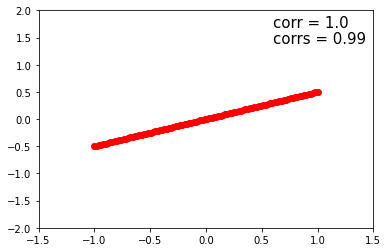

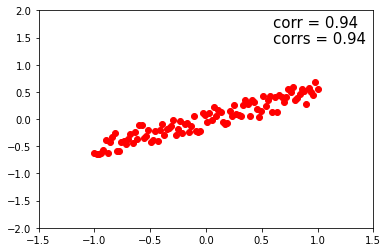

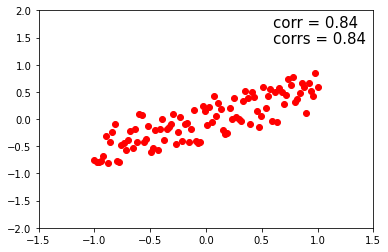

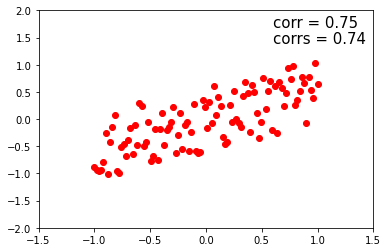

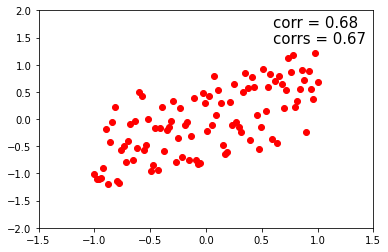

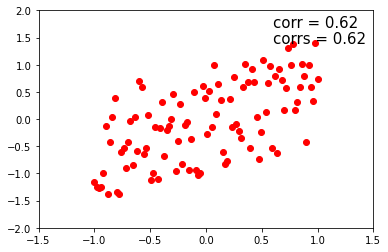

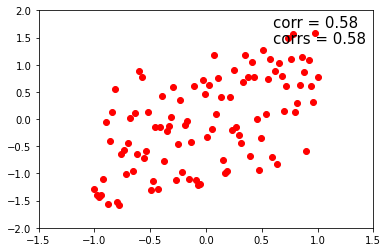

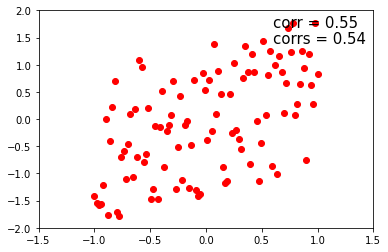

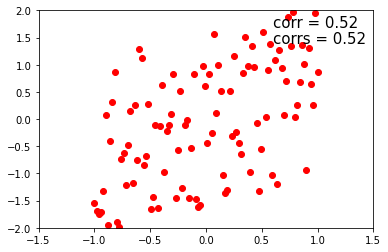

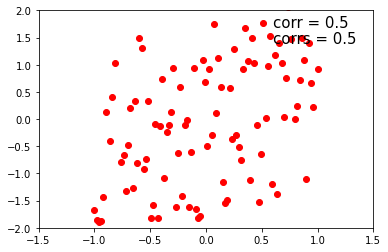

In [17]:
N = 100
X = np.linspace(-1,1, N)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
for sigma in np.arange(0,2,0.2):
    Y = 0.5*X + erro*sigma
    plt.plot(X,Y, 'ro')
    corr, p_value = pearsonr(X, Y) # calcula a correlação
    corr = int(corr*100)/100
    corrs, p_values = spearmanr(X, Y)
    corrs = int(corrs*100)/100
    
    string = 'corr = '+ str(corr)
    string2 = 'corrs = '+ str(corrs)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(0.6,1.7, string, fontsize=15)
    plt.text(0.6,1.4, string2, fontsize=15)
    
    plt.show(True)

#### 6- Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

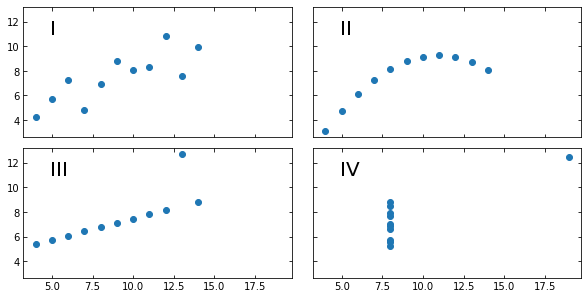

In [15]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')
plt.show()

In [16]:
# I

corr, p_value = pearsonr(x, y1)
corr = int(corr*100)/100
corrs, p_values = spearmanr(x, y1)
corrs = int(corrs*100)/100

print('Conjunto I')
print('Correlação de pearson:'+ str(corr))
print('Correlação de Spearman:'+ str(corrs)+'\n')

#II

corr, p_value = pearsonr(x, y2)
corr = int(corr*100)/100
corrs, p_values = spearmanr(x, y2)
corrs = int(corrs*100)/100

print('Conjunto II')
print('Correlação de pearson:'+ str(corr))
print('Correlação de Spearman:'+ str(corrs)+'\n')

#III
corr, p_value = pearsonr(x, y3)
corr = int(corr*100)/100
corrs, p_values = spearmanr(x, y3)
corrs = int(corrs*100)/100

print('Conjunto III')
print('Correlação de pearson:'+ str(corr))
print('Correlação de Spearman:'+ str(corrs)+'\n')


#IV
corr, p_value = pearsonr(x4, y4)
corr = int(corr*100)/100
corrs, p_values = spearmanr(x4, y4)
corrs = int(corrs*100)/100

print('Conjunto IV')
print('Correlação de pearson:'+ str(corr))
print('Correlação de Spearman:'+ str(corrs)+'\n')




Conjunto I
Correlação de pearson:-0.52
Correlação de Spearman:-0.5

Conjunto II
Correlação de pearson:-0.71
Correlação de Spearman:-0.5

Conjunto III
Correlação de pearson:-0.34
Correlação de Spearman:-0.5

Conjunto IV
Correlação de pearson:0.81
Correlação de Spearman:0.5



Nota-se que apenas um dado aparentando ser outiler pode bagunçar completamente as correlações de perason e Spearman